# 1. Importing the required packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
%matplotlib inline
from scipy.stats import kde

# 2. Reading the data.

In [4]:
df = pd.read_csv("/D:/Projects/IDS Assignment 1/googleplaystore.csv")

FileNotFoundError: [Errno 2] File /D:/Projects/IDS Assignment 1/googleplaystore.csv does not exist: '/D:/Projects/IDS Assignment 1/googleplaystore.csv'

In [ ]:
df.head()

# 3. Data Cleaning

#### 3.1 Cleaning the 'Size' column

In [174]:
df.drop(df.index[10472],inplace = True)

In [175]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

#### 3.2 Cleaning the 'Installs' column

In [176]:
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))
df['Installs'] = df['Installs'].map(lambda x: x.replace(",",""))

#### 3.3 Cleaning the 'Price' column

In [177]:
df['Price'] = df['Price'].map(lambda x: x.lstrip('$').rstrip())

#### 3.4 Dropping row 10472 due to missing value in the 'Category' column

#### 3.5 Replacing the missing values with mean

In [178]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')  # mean is used to fill all the NaN values
df['Rating'] = imputer.fit_transform(df[['Rating']])

In [179]:
df['Rating'].round(1)
df.dropna(axis = 0,inplace = True)

#### 3.5 Changing the datatype (To float/int)

In [180]:
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = pd.to_numeric(df['Price'])

#### 3.6 Cleaning 'Android Ver' Column

In [181]:
newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

4.0    6646
2.0    1323
5.0     583
3.0     286
1.0     135
6.0      57
0.0      56
7.0      43
8.0       6
Name: Android Ver, dtype: int64

# 4. Data Visualization

#### 4.1 Apps of different categories and their average ratings

##### A dataframe is created with one column having the applications that are grouped by their categories and the other column     having the average ratings of the categories. With this, we'll be able to determine whether there is a strong relation between the category of application and its rating or not.

In [182]:
unique_category = list(df['Category'].unique())
ratings = []

for category in unique_category:
    x = df[df['Category'] == category]
    average_rating = x['Rating'].sum()/len(x)
    ratings.append(average_rating)
data = pd.DataFrame({'Category':unique_category, 'Rating':ratings})
new_index = (data['Rating'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

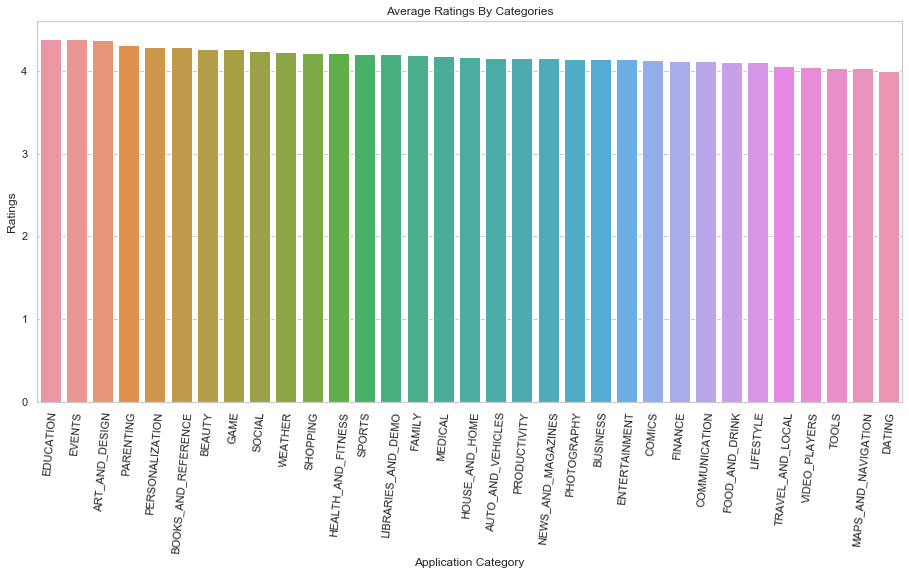

In [183]:
plt.figure(figsize=(15.5,7))
sns.barplot(x=sorted_data['Category'], y=sorted_data['Rating'])

plt.xticks(rotation = 85)
plt.xlabel('Application Category')
plt.ylabel('Ratings')
plt.title('Average Ratings By Categories')
plt.show()

##### This shows that the Apps belonging to the 'Education' category have a higher rating while the Apps belonging to the 'Dating' category has lower ratings when compared to the other categories.

#### 4.2 Number of Apps available based on 'Category'

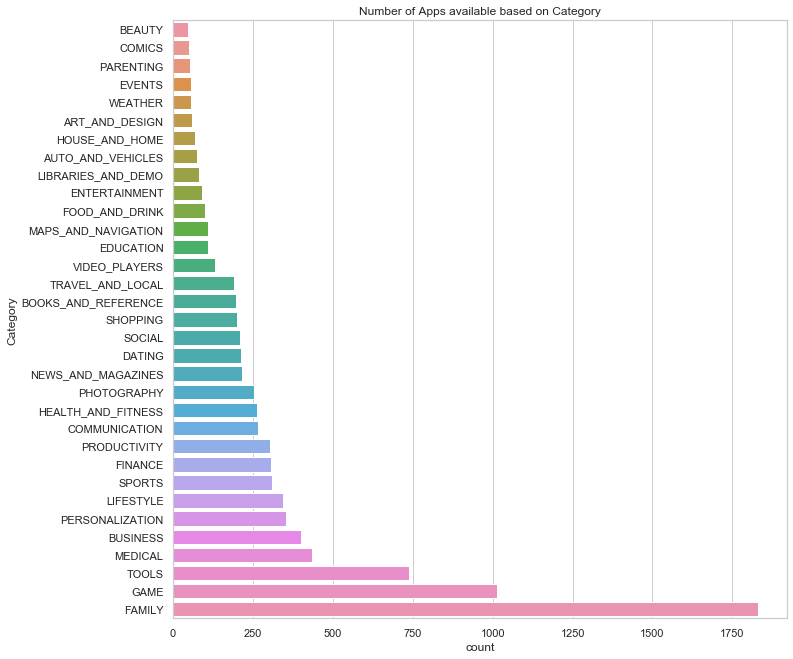

In [184]:
#sns.set(style='darkgrid')
plt.figure(figsize=(11,11))
sns.countplot(y='Category',data=df,order=df['Category'].value_counts(ascending=True).index)
plt.title('Number of Apps available based on Category')
plt.show()

##### There are less than 250 Apps in the 'Beauty' category, while the 'Family' category has more than 1750 Apps.

#### 4.2 Distribution of User Ratings

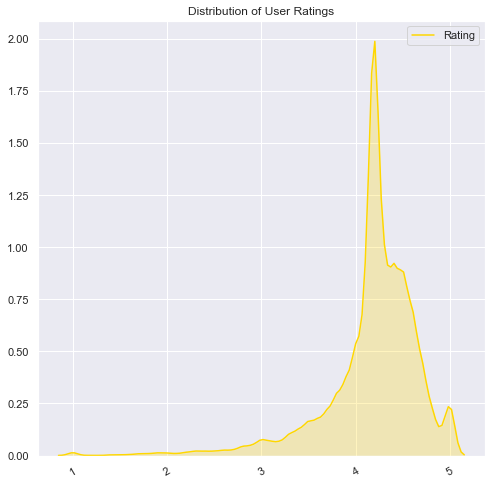

In [232]:
sns.set(style='darkgrid')
plt.figure(figsize=(8,8))
sns.kdeplot(df['Rating'],shade=True,color='gold')
plt.xticks(rotation=30)
plt.title('Distribution of User Ratings')
plt.show()

#### 4.3 Count Plot for various versions

In [186]:
df['Android Ver'].value_counts()

4.0    6646
2.0    1323
5.0     583
3.0     286
1.0     135
6.0      57
0.0      56
7.0      43
8.0       6
Name: Android Ver, dtype: int64

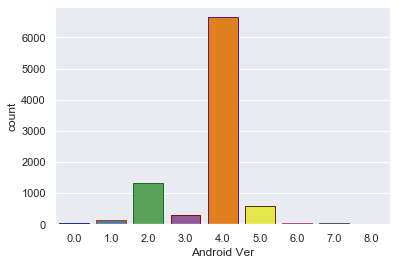

In [187]:
sns.set(style='darkgrid')
sns.countplot(df['Android Ver'],palette="Set1",linewidth=1,edgecolor=sns.color_palette("dark",9))

In [188]:
lbl=df['Type'].unique()
sizes=df['Type'].value_counts()
explode = (0.05,0.05) 
colors = ['lime','darkorange']

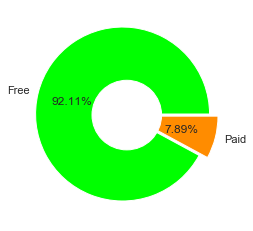

In [189]:
plt.pie(sizes,colors=colors,labels=lbl, autopct='%1.2f%%',explode=explode)
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#lt.figure(figsize=(15,15))

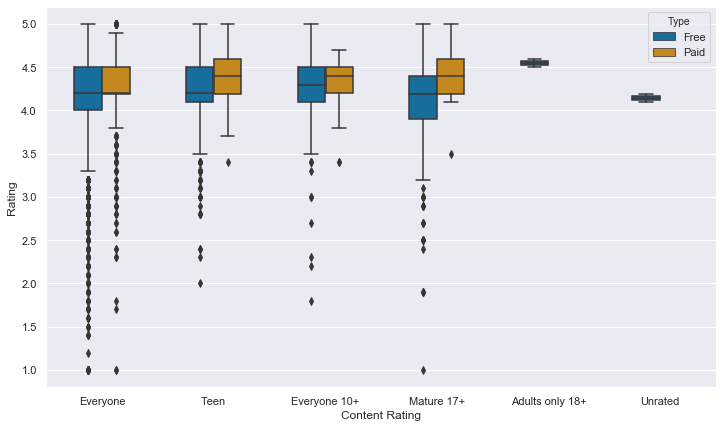

In [190]:
plt.figure(figsize = (12,7))
sns.boxplot(x='Content Rating', y='Rating', hue='Type', data=df, width=0.5,
                 palette="colorblind")
plt.show()



#### We can conclude that people tend to vote higher when the apps are paid  

C:\Users\Nav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Nav\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Nav\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\Nav\Anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Nav\Anaconda3\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\Nav\Anaconda3\lib\site-packages\matplotlib\contour.py:

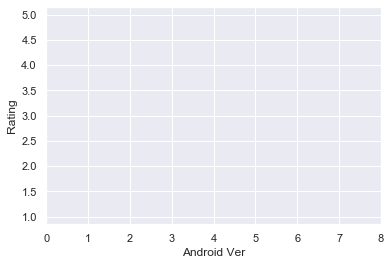

In [191]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df['Android Ver'], df['Rating'], cmap=cmap, n_levels=60, shade=True);

In [192]:
new_df = df.groupby('Category').mean()
new_df.sort_values('Rating', inplace = True)

new_df.head()


,Rating,Reviews,Size,Installs,Price,Android Ver
Category,,,,,,
DATING,4.000842,18398.608491,16.625557,6.692491e+05,0.110613,4.028302
MAPS_AND_NAVIGATION,4.035119,33945.907407,16.614713,1.620647e+06,0.138519,3.814815
TOOLS,4.036286,142845.101764,8.782927,4.785068e+06,0.320176,3.637720
VIDEO_PLAYERS,4.044858,183670.961832,16.084580,6.808151e+06,0.007557,3.717557
TRAVEL_AND_LOCAL,4.067897,40205.385417,24.654495,1.857636e+06,0.202969,3.921875


In [193]:
# list of categories
cat_list = list(df.Category.unique())

# content rating lists
everyone = []
teen = []
everyone_10 = []
mature_17 = []
adults_only_18 = []
unrated = []

# the function which fills category's (temp) content rating counts into lists
def insert_counts(everyone, teen, everyone_10, mature_17, adults_only_18, unrated, temp):
    
    # everyone
    try:
        everyone.append(temp.groupby('Content Rating').size()['Everyone'])
    except:
        everyone.append(0)
    
    # teen
    try:
        teen.append(temp.groupby('Content Rating').size()['Teen'])
    except:
        teen.append(0)
    
    # everyone 10+
    try:
        everyone_10.append(temp.groupby('Content Rating').size()['Everyone 10+'])
    except:
        everyone_10.append(0)
        
    # mature 17+
    try:
        mature_17.append(temp.groupby('Content Rating').size()['Mature 17+'])
    except:
        mature_17.append(0)
        
    # adults only 18+
    try:
        adults_only_18.append(temp.groupby('Content Rating').size()['Adults only 18+'])
    except:
        adults_only_18.append(0)
        
    # unrated
    try:
        unrated.append(temp.groupby('Content Rating').size()['Unrated'])
    except:
        unrated.append(0)

# fill lists iteratively via function
for cat in cat_list:
    temp = df[df.Category == cat]
    insert_counts(everyone, teen, everyone_10, mature_17, adults_only_18, unrated, temp)

[Text(0, 0.5, 'Categories'),
 Text(0.5, 0, 'Percentage of Content Ratings'),
 Text(0.5, 1.0, 'Percentage of Categories According to Content Ratings ')]

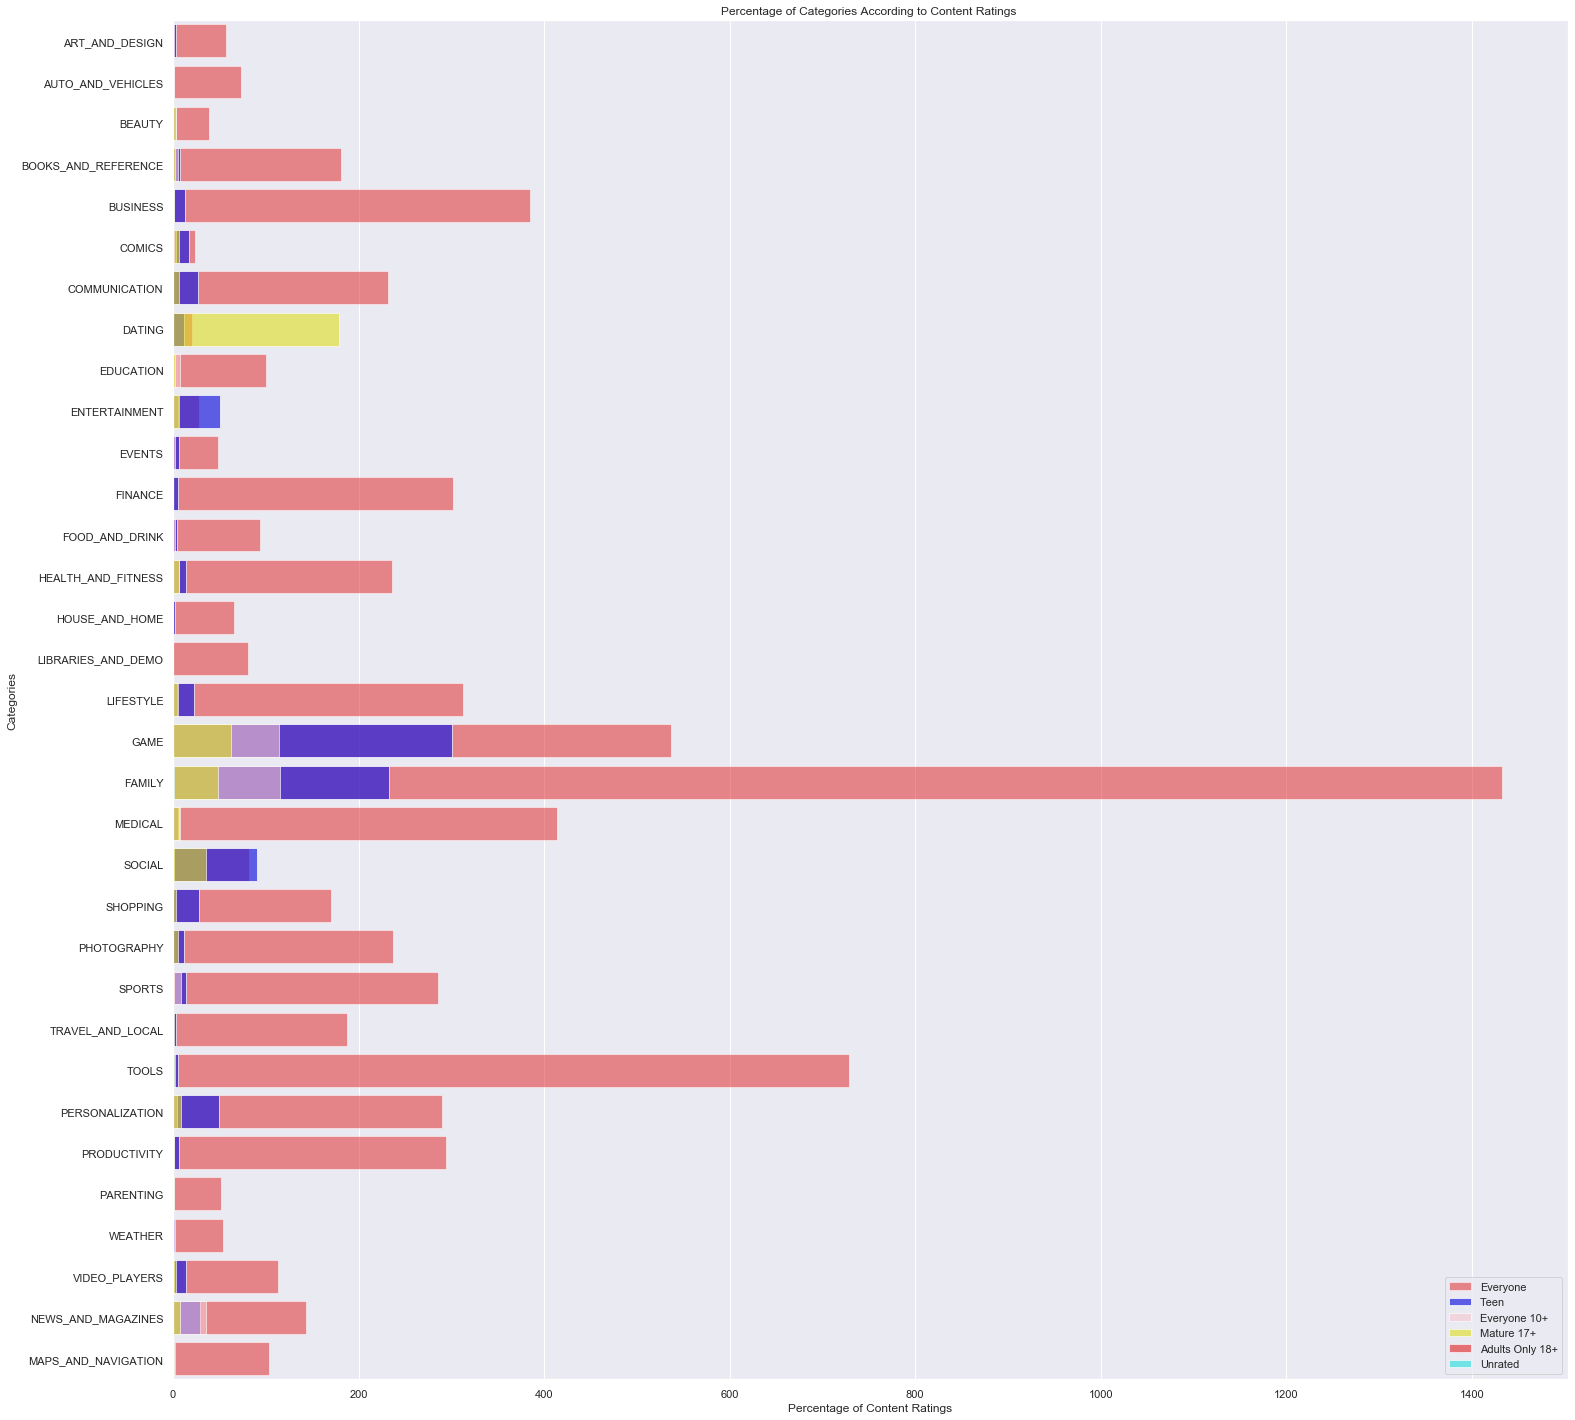

In [194]:
f,ax = plt.subplots(figsize = (25,25))
sns.barplot(x=everyone,y=cat_list,color='red',alpha = 0.5,label='Everyone')
sns.barplot(x=teen,y=cat_list,color='blue',alpha = 0.7,label='Teen')
sns.barplot(x=everyone_10,y=cat_list,color='pink',alpha = 0.6,label='Everyone 10+')
sns.barplot(x=mature_17,y=cat_list,color='yellow',alpha = 0.6,label='Mature 17+')
sns.barplot(x=adults_only_18,y=cat_list,color='red',alpha = 0.6,label='Adults Only 18+')
sns.barplot(x=unrated,y=cat_list,color='aqua',alpha = 0.6,label='Unrated')

ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Percentage of Content Ratings', ylabel='Categories',title = "Percentage of Categories According to Content Ratings ")

#### One can easily observe that nearly all the applications are targeting 'Everyone', except 'Dating','Entertainment' and 'Social' applications.

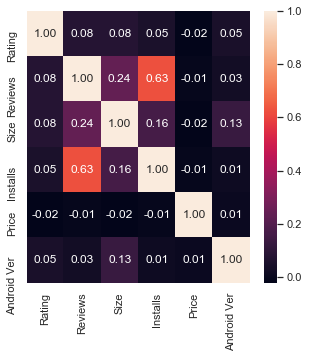

In [195]:
f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', ax = ax)
plt.show()

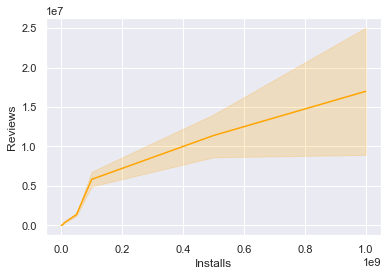

In [196]:
g = sns.lineplot(df['Installs'],df['Reviews'],data=df, color="orange")
plt.show()

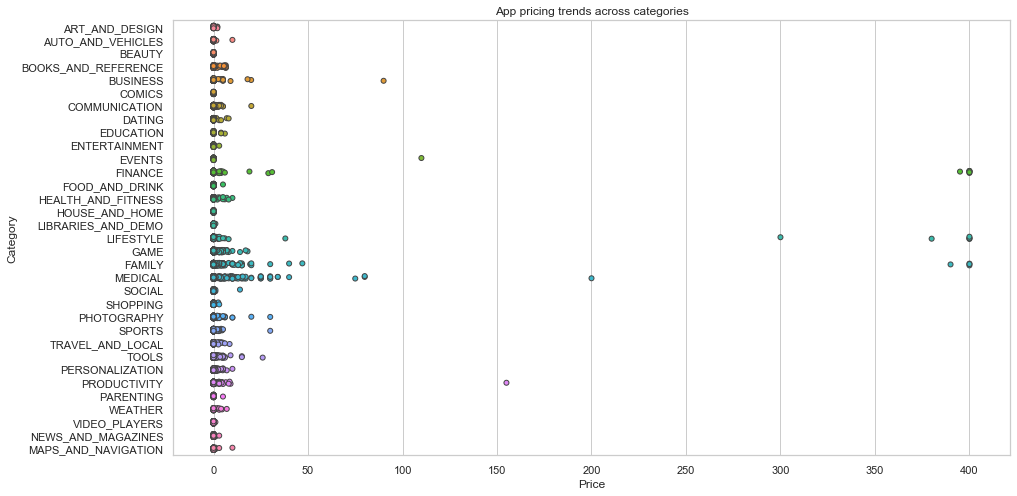

In [197]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(df["Price"], df["Category"], data=df, jitter=True, linewidth=1)
title = ax.set_title('App pricing trends across categories')

In [198]:
df[['Category', 'App']][df.Price > 200].groupby([ "Category"], as_index=False).count()

,Category,App
0,FAMILY,4
1,FINANCE,7
2,LIFESTYLE,6


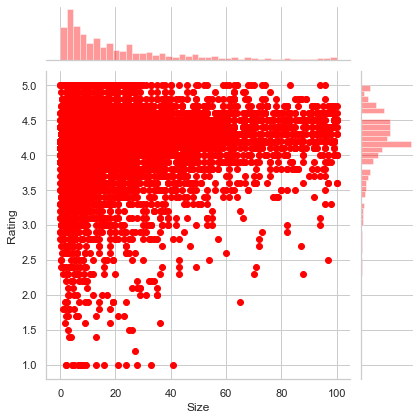

In [213]:
#df['Rating_int'] = df.Rating.astype(int)
#df['Size_int'] = df.Size.astype(int)
groups = df.groupby('Category').filter(lambda x: len(x) >= 50).reset_index()
sns.set_style("whitegrid")
ax = sns.jointplot(df['Size'],df['Rating'],color='red')

####We can conclude that most of the apps with the highest rating have a size between approximately 20Mb and 40Mb.

Text(0.5, 0, 'Ratings')

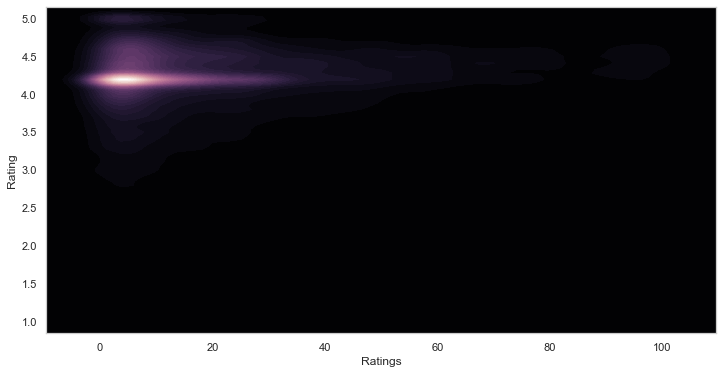

In [227]:
#df['Rating_int'] = df.Rating.astype(int)
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
plt.figure(figsize=(12,6))
sns.kdeplot(df['Size'],df['Rating'],cmap=cmap, n_levels=60, shade=True)

#plt.xticks(rotation = 85)
plt.xlabel('Ratings')
#plt.ylabel('Number of Reviews')
#plt.title('Rating distribution of reviews')
#plt.show()

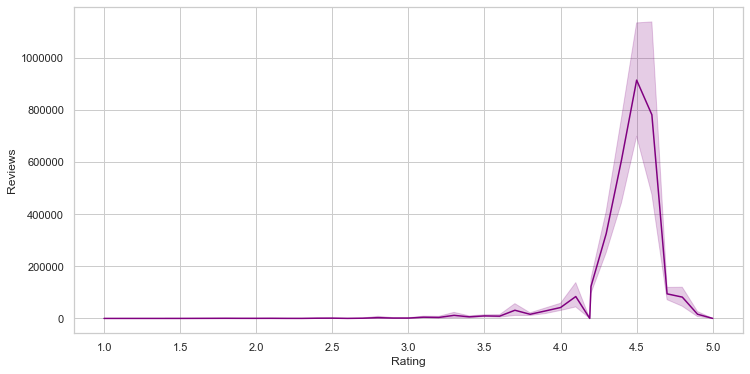

In [231]:
plt.figure(figsize=(12,6))
sns.lineplot(df['Rating'],df['Reviews'],color='purple')